In [2]:
import numpy as np
import pandas as pd
import math
import warnings
import matplotlib.pyplot as graph
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Data1.csv")
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data

,0,1,2
0,-0.744863,-0.914015,-1.815700
1,0.039325,1.064930,-1.587150
2,-0.407660,0.397869,-1.909981
3,0.033789,0.967298,-1.014872
4,-0.179156,0.695176,-1.491172
...,...,...,...
1995,0.398439,-0.292394,1.984417
1996,0.990135,0.141825,2.818675
1997,0.238568,-0.284869,1.386192
1998,-0.006532,-0.993170,1.481348


In [51]:
#defining sigmoidal function
def sigmoidal(x):
    y = 1/(1 + np.exp(-x))
    return y

#defining logistic function
def logistic_pdf(x):
    y = sigmoidal(x)(1 - sigmoidal(x))
    return y


#creating data matrix of givaen signals
def signal_data_matrix(data):
    X = []
    for i in range(len(data)):
        a = []
        for j in range(len(data.columns)):
            a.append(data.iloc[i][j])
        X.append(a)
    return np.matrix(X)

#defining Frobenius norm
def Frobenius_norm(A):
    A = np.array(A)
    x = 0
    for i in range(len(A)):
        for j in range(len(A[0])):
            x += A[i][j]**2
    return math.sqrt(x)


def whiten(X):
    # Calculate the covariance matrix
    coVarM = np.cov(np.array(X)) 
    
    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)
    
    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S)) 
    
    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))
    
    # Project onto whitening matrix
    Xw = np.dot(whiteM, X) 
    
    return Xw, whiteM



        

def ICA(data,alpha):
    X = signal_data_matrix(data)

    X, = whiten(X)
    
    #initialize the matrix
    W_new = np.matrix(np.eye(len(X.T)))

    W_old = W_new + 1

    while Frobenius_norm(W_new - W_old)>0.00001:
        W_old = W_new
        

        for i in range(len(X)):
            lis = []
            for j in range(len(X.T)):
                lis.append(1 - sigmoidal(float(np.matmul(W_old[j],X[i].T))))
            lis = np.matrix(lis).T
            W_new = W_old + alpha*(np.matmul(lis,X[i]) + np.linalg.inv(W_old.T))
        return np.matmul(W_new,X.T).T
    

    


In [34]:
X = signal_data_matrix(data)
len(X.T)
W_new = np.matrix(np.eye(len(X.T)))
float(np.matmul(W_new[0],X[0].T))

-0.9472301513260163

In [39]:
Z = ICA(data,0.01)
x = np.array([float(i) for i in X[:,0]]).T
y = np.array([float(i) for i in X[:,1]]).T
z = np.array([float(i) for i in X[:,2]]).T
x

array([-0.94723015, -0.16304181, -0.61002741, ...,  0.03620091,
       -0.20889913, -3.20538208])

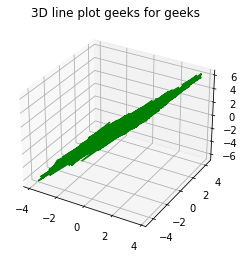

In [26]:
fig = graph.figure()
ax = graph.axes(projection ='3d')
x = np.array([float(i) for i in Z[:,0]]).T
y = np.array([float(i) for i in Z[:,1]]).T
z = np.array([float(i) for i in Z[:,2]]).T

ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
graph.show()

In [22]:
m = np.mean(np.array(X),axis = 0)
data1 = data
for i in range(len(data)):
    data1.iloc[i] = data1.iloc[i] - m

In [23]:
data1

,0,1,2
0,-0.947230,-1.075319,-2.093030
1,-0.163042,0.903626,-1.864480
2,-0.610027,0.236565,-2.187311
3,-0.168578,0.805994,-1.292201
4,-0.381523,0.533872,-1.768502
...,...,...,...
1995,0.196072,-0.453698,1.707087
1996,0.787768,-0.019478,2.541346
1997,0.036201,-0.446173,1.108863
1998,-0.208899,-1.154474,1.204019


In [30]:
t = np.cov(np.array(X))
u = np.round(t)
np.diag(1/np.sqrt(u))

array([       inf, 0.70710678, 0.70710678, ..., 1.        , 1.        ,
       1.        ])

array([-2.0930299 , -1.86447985, -2.18731058, ...,  1.10886274,
        1.2040189 , -5.10319803])

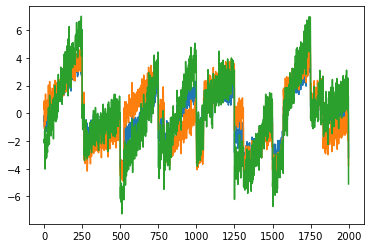

In [47]:
X = signal_data_matrix(data1)
x = np.array([float(i) for i in X[:,0]]).T
y = np.array([float(i) for i in X[:,1]]).T
z = np.array([float(i) for i in X[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)
z

In [52]:
Z = ICA(data1,0.001)
x = np.array([float(i) for i in Z[:,0]]).T
y = np.array([float(i) for i in Z[:,1]]).T
z = np.array([float(i) for i in Z[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)


AttributeError: 'tuple' object has no attribute 'T'